In [1]:
# Start Classification

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# All sklearn datasets have a similar structure

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [5]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

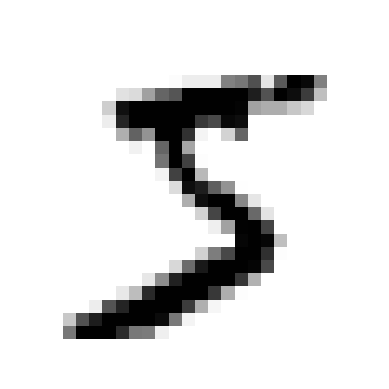

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y.iloc[0]

'5'

In [8]:
# Here y is a string, ml algos expect numbers so, let's cast it into one

In [9]:
import numpy as np
y = y.astype(np.uint8)

In [10]:
y.iloc[0]

np.uint8(5)

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
# Designing a binary classifier for now which will detect the number 5, that's it

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
# Trying out the SGD Stochastic Gradient Descent Classifier

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier()

In [17]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [18]:
sgd_clf.predict([some_digit])

C:\python-ml\myvvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [19]:
# Evaluating a classifier is trickier than evaluating a regressor

In [20]:
# Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96415, 0.9646 , 0.9061 ])

In [22]:
# The best model had 96% accuracy however, only 10% of the dataset has the number 5 and so, it's easy to trick it so, accuracy is not always the right measure

In [23]:
# Confusion matrix gives a clear picture
from sklearn.model_selection import cross_val_predict

# Returns the predictions for each fold
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52286,  2293],
       [  872,  4549]])

In [24]:
# Each row represents a class
# Each column represents predicted class
                # Predicted not 5       # Predicted 5 
# Not 5 Actual
# Actual 5

# TN FP
# FN TP

In [25]:
# Metric Precision

# TP / (TP+FP) .. Of course, this gives the precision of the model in detecting real cases

# Metric Recall/ Sensitivity/ True Positive rate

# TP / (TP+FN) .. false negatives gives us the positives that were missed

In [26]:
# Sklearn for precision and recall

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

# Correct 81% of the time

0.6648640748319204

In [27]:
recall_score(y_train_5, y_train_pred)

# Correctly identifies only 74 percent of the times

0.8391440693598967

In [28]:
# F1 score combines precision and recall

from sklearn.metrics import f1_score

In [29]:
f1_score(y_train_5, y_train_pred)

0.7419065481529805

In [30]:
#  Precision recall trade-off
'''

Precision: "Of all the instances the model predicted as positive, how many were actually positive?"

Recall: "Of all the actual positive instances, how many did the model correctly identify?"


Increasing recall - often - decreses precision
Increasing precision - often - decreases recall

Why?

Increasing precision means tightening up the regulations for a digit to be considered '5' (which could result in more false negatives and increase recall)

'''

'\n\nPrecision: "Of all the instances the model predicted as positive, how many were actually positive?"\n\nRecall: "Of all the actual positive instances, how many did the model correctly identify?"\n\n\nIncreasing recall - often - decreses precision\nIncreasing precision - often - decreases recall\n\nWhy?\n\nIncreasing precision means tightening up the regulations for a digit to be considered \'5\' (which could result in more false negatives and increase recall)\n\n'

In [31]:
# The above statement depends on the tresholds that the algorithm has set

In [32]:
from sklearn.metrics import precision_recall_curve

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

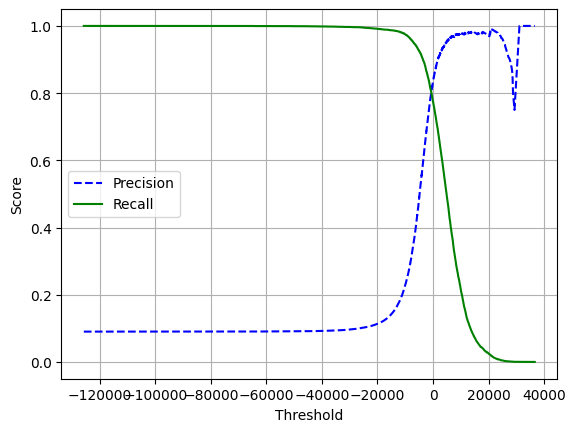

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [41]:
# Let's plot precision vs recall to select a value

In [54]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(precisions, recalls, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall")
    plt.grid(True)
    plt.show()

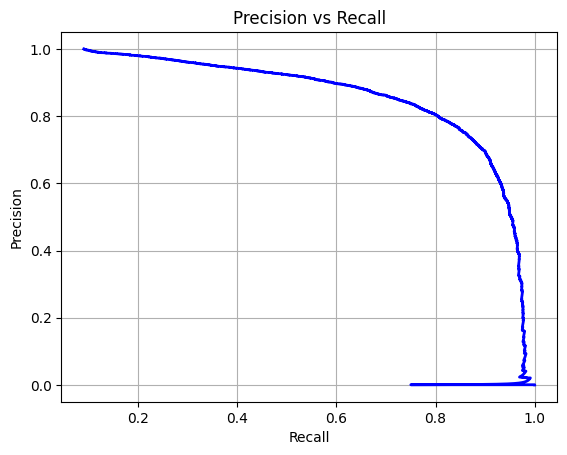

In [55]:
plot_precision_vs_recall(precisions, recalls)

In [56]:
# Using these two graphs, we can achieve any level of precision but, at the cost of some recall

In [58]:
# How to determine what treshold to use for 90% precision?
treshold_for_90_precision = tresholds[np.argmax(precisions >= 0.90)]
treshold_for_90_precision

np.float64(1661.1031955927115)

In [60]:
y_train_pred_90 = (y_scores >= treshold_for_90_precision)

In [61]:
precision_score(y_train_5, y_train_pred_90)

0.900286944045911

In [62]:
recall_score(y_train_5, y_train_pred_90)

0.6945213060320974

In [63]:
# If someone asks, can you create a classifier for me with precision greater than 99%, your answer should be at what recall?

In [64]:
# ROC Curve
# Reciever operating characterstic curve used with binary classifiers TPR vs FPR

from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

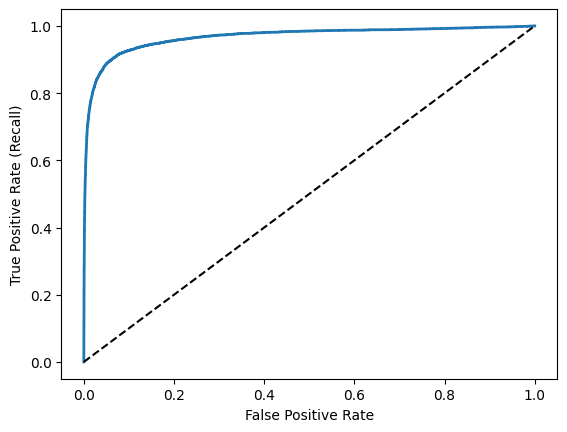

In [68]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

plot_roc_curve(fpr, tpr)
plt.show()

In [69]:
# Higher the recall, more falls positives

In [70]:
# Comparing Classifiers: AOC (Area under curve)

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9671013376395358)

In [74]:
# Perfect classifier will have AOC = 1

In [75]:
# ROC Curve is similar to Precision/ Recall so how to chose a metric to compare models?
# PR when the positive class is rare in the dataset
# else ROC Curve

# In terms of previous example
# The roc curve is great and so is the roc auc score so one might think that this classifier is great however, there are a very few positives so 
# PR curve makes it way easier

In [76]:
# Let's create a random forest regressor and compare it's curve

from sklearn.ensemble import RandomForestClassifier

In [78]:
forest_classifier = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_classifier, X_train, y_train_5, cv=3,
 method="predict_proba")

In [79]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

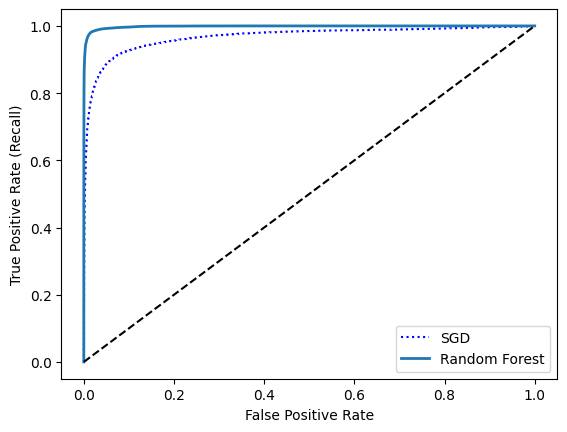

In [80]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [81]:
# Superior performance by random Forest

In [82]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [83]:
### Multiclass Classification

In [84]:
# Some algos are capable of handling multiple classes natively like SGD, Naive Bayes , Random Forest

# Logistic Regression and SVM dont

In [85]:
# Strategy 1:

# Train 10 binary classifiers for 10 different classes
# OVR one vs rest

# Strategy 2:

# Train a binary classifier for every pair of digits (0s and 1s) & (0s and 2s).. etc
# (n)*(n-1) / 2 classifiers needed for n classes

# OvO one vs one strategy

# For algorithms that scake poorly with the training set eg Support Vector Machines

In [87]:
# Scikit learn detects automatically what strategy to take

from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.predict([some_digit])

C:\python-ml\myvvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)